In [1]:
import pandas as pd

In [2]:
from IPython.display import Image
Image(url="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

### Loading dataset

In [3]:
test =pd.read_csv(r"C:\Users\GODFATHER\Desktop\Data Analytics\Titanic\test.csv")
train =pd.read_csv(r"C:\Users\GODFATHER\Desktop\Data Analytics\Titanic\train.csv")

## 1)  EDA

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data Dictionary  

    Survived: 0 = No, 1 = Yes
    pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    sibsp: # of siblings / spouses aboard the Titanic
    parch: # of parents / children aboard the Titanic
    ticket: Ticket number
    cabin: Cabin number
    embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


#### There are 891 rows and 12 columns in training dataset

In [5]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


#### There are 418 rows and 11 columns in test dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


We can see Age & Cabin values are missing for both train & test . 

## Visualization 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Categorical Features

    Pclass
    Sex
    SibSp 
    Parch 
    Embarked
    Cabin



In [9]:
def bar_plot(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    

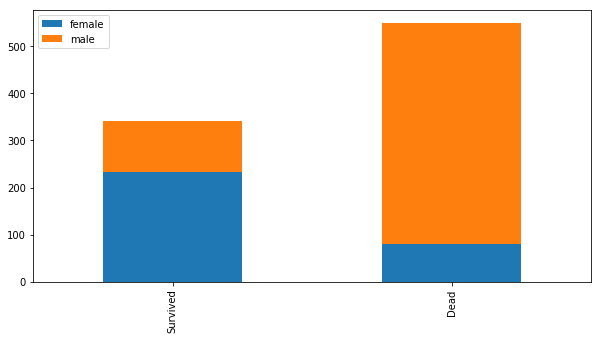

In [10]:
bar_plot("Sex")

The Chart confirms Women more likely survivied than Men

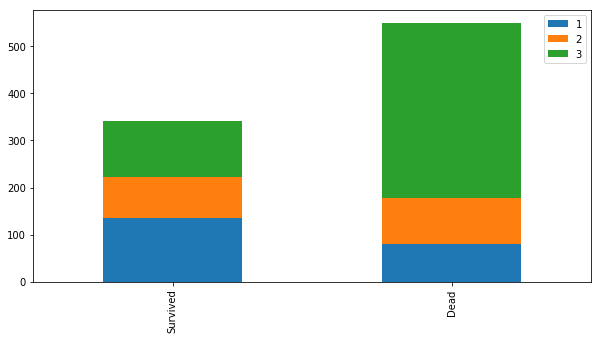

In [11]:
bar_plot("Pclass")

1st class passengers are more likely survivied than other classes . 
3rd class more likely dead than other classes

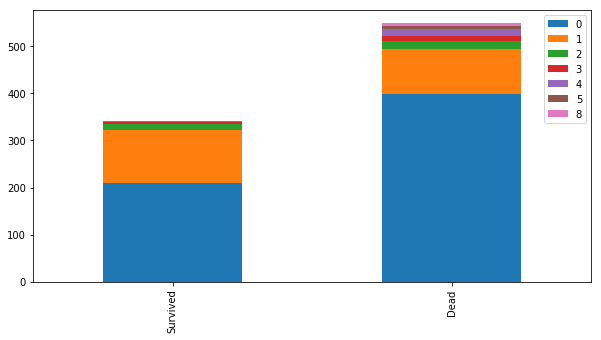

In [12]:
bar_plot("SibSp")

 A person aboarded with more than 2 siblings or spouse more likely survived.

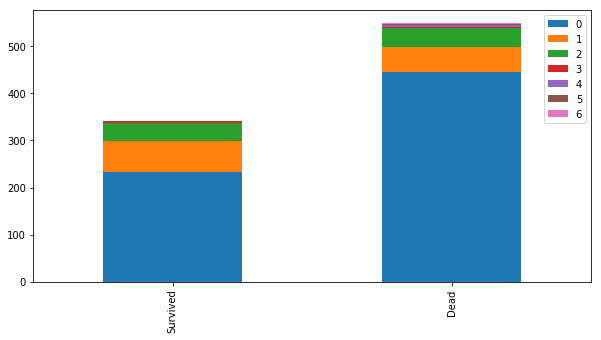

In [13]:
bar_plot("Parch")

A person aboarded with more than 2 parents or children more likely survived.

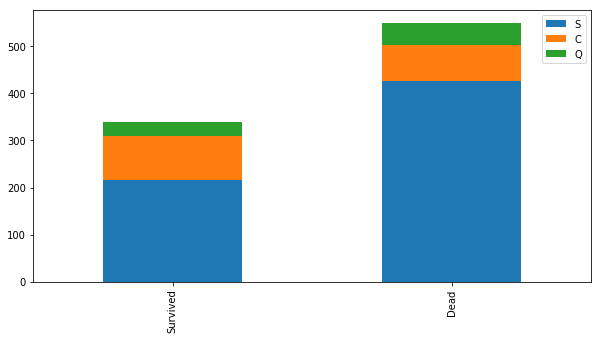

In [14]:
bar_plot("Embarked")

A person aboarded from Cherbourg slightly more likely survived.

In [15]:
Image(url="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

## 2) Feature Extraction 

### 2.1 Name

In [16]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Lady          1
Don           1
Countess      1
Ms            1
Capt          1
Sir           1
Mme           1
Name: Title, dtype: int64

In [18]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

### Title map

Mr 0 
Miss  1
Mrs  2
Others 3

In [19]:
title_maping = {"Mr": 0,"Miss":1,"Mrs":2,"Master":3,"Rev":3,"Col":3,"Dona":3,"Dr":3,"Ms":3,"Mlle":3,"Mme":3,"Jonkheer":3,
               "Major":3,"Countess":3,"Capt":3,"Sir":3,"Lady":3,"Don":3}
for dataset in train_test_data:
    dataset["Title"] =dataset["Title"].map(title_maping)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


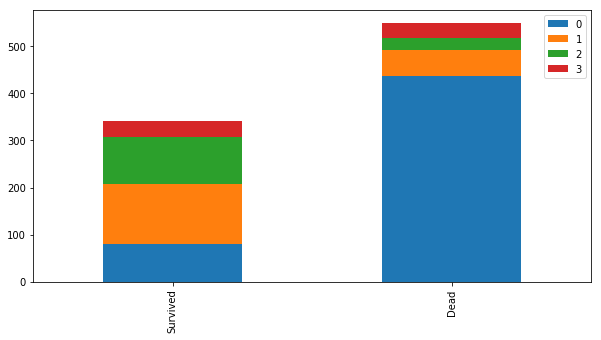

In [21]:
bar_plot('Title')

In [22]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### 2.2) Sex

In [24]:
sex_mapping = {"male": 0,"female": 1}
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


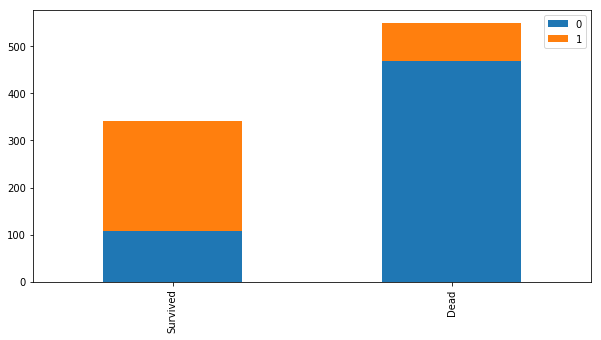

In [26]:
bar_plot("Sex")

###  2.3 Age

###### Some Age is missing. Fill missing age with median age for each title .

In [27]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

C:\Users\GODFATHER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


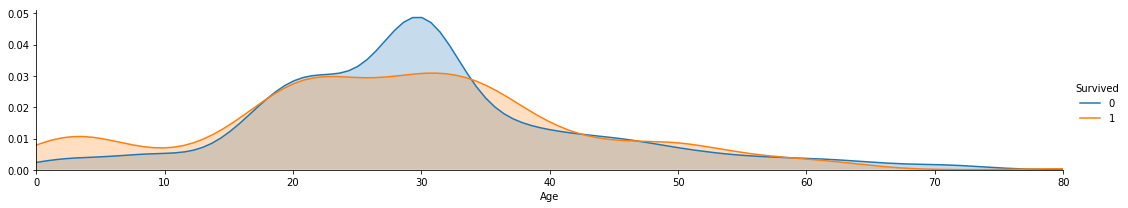

In [28]:
facet = sns.FacetGrid(train, hue="Survived",aspect=5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

##### Converting Numerical Age to Categorical Variable

child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [29]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<=16,"Age"]=0,
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<=26),"Age"]=1,
    dataset.loc[(dataset["Age"]>26)&(dataset["Age"]<=36),"Age"]=2,
    dataset.loc[(dataset["Age"]>36)&(dataset["Age"]<=62),"Age"]=3,
    dataset.loc[dataset["Age"]>62 , "Age"]=4,
    

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


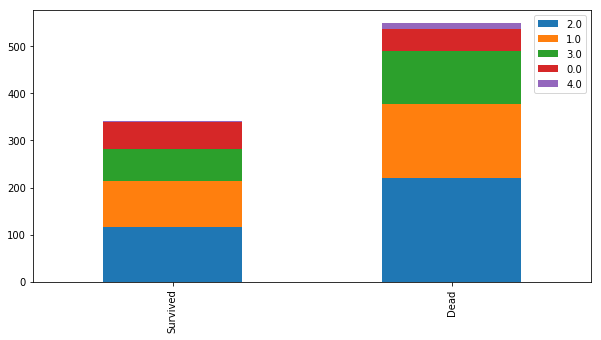

In [31]:
bar_plot("Age")

### 2.4 Embarked

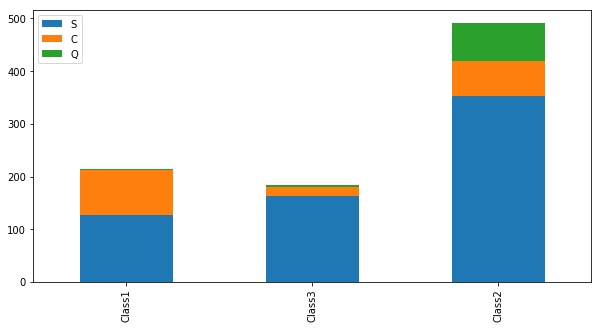

In [32]:
Class1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Class2 = train[train["Pclass"]==2]["Embarked"].value_counts()
Class3 = train[train["Pclass"]==3]["Embarked"].value_counts()
df = pd.DataFrame([Class1,Class2,Class3])
df.index ={"Class1","Class2","Class3"}
df.plot(kind="bar",stacked=True,figsize=(10,5))

more than 50% of 1st,2nd & 3rd class passenegers are from S embark.

#### Filling missing and Mapping

In [33]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [34]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


### 2.5 Fare 

fill missing Fare with median fare for each Pclass




In [36]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


C:\Users\GODFATHER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


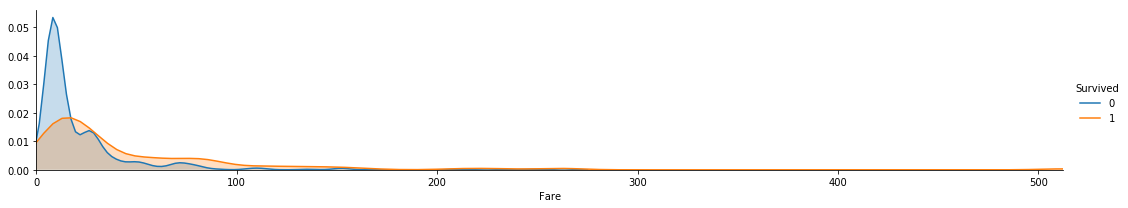

In [38]:
facet = sns.FacetGrid(train, hue="Survived",aspect=5)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train["Fare"].max()))
facet.add_legend()
plt.show()

In [40]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"]=0,
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30),"Fare"]=1,
    dataset.loc[(dataset["Fare"]>30)&(dataset["Fare"]<=100),"Fare"]=2,
    dataset.loc[dataset["Fare"]>100,"Fare"]=3

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### Cabin 

In [43]:
train["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
C22 C26        3
F2             3
F33            3
D36            2
C123           2
B58 B60        2
E24            2
B77            2
C124           2
F G73          2
E25            2
C68            2
C126           2
B35            2
B18            2
D33            2
D20            2
D35            2
D17            2
E33            2
B51 B53 B55    2
C65            2
B22            2
C93            2
C92            2
              ..
C30            1
F G63          1
C104           1
B69            1
B19            1
B39            1
C128           1
D7             1
A24            1
C87            1
C91            1
A26            1
C45            1
C103           1
E12            1
C49            1
A20            1
C70            1
E10            1
C118           1
F E69          1
T              1
B42            1
B102           1
C46            1
D49            1
D46            1
C111          

In [44]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [46]:
train["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

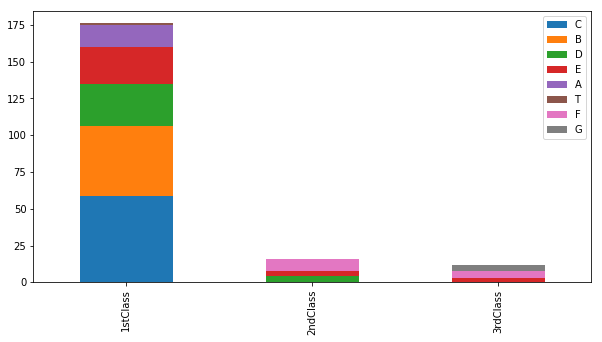

In [58]:
Class1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Class2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Class3 = train[train["Pclass"]==3]["Cabin"].value_counts()
df = pd.DataFrame([Class1,Class2,Class3])
df.index=(["1stClass","2ndClass","3rdClass"])
df.plot(kind="Bar",stacked=True,figsize=(10,5))

In [59]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset["Cabin"]= dataset["Cabin"].map(cabin_mapping)

In [63]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

### Family 

In [66]:
train["Family"] = train["SibSp"] + train["Parch"]+1
test["Family"]  = test["SibSp"] + test["Parch"]+1

C:\Users\GODFATHER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


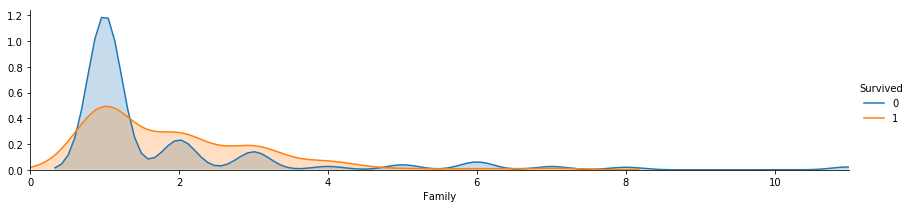

In [67]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Family",shade=True)
facet.set(xlim=(0,test["Family"].max()))
facet.add_legend()


In [68]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['Family'] = dataset['Family'].map(family_mapping)

In [80]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [ ]:
drop_features = ["Ticket","SibSp","Parch"]
train = train.drop(drop_features,axis=1)
test = test.drop(drop_features,axis=1)
train = train.drop(['PassengerId'], axis=1)

In [81]:
train_data  =train.drop(["Survived"],axis=1)
target = train["Survived"]



In [82]:
train_data.shape , target.shape

((891, 8), (891,))

In [83]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


## Modelling 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


### 6.2 Cross Validation (K-Fold)

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 6.2.1 KNN 

In [95]:
clf =KNeighborsClassifier(n_neighbors=13)
scoring = "accuracy"
score = cross_val_score(clf,train_data,target,cv=k_fold,scoring=scoring,n_jobs=1)
print(score.mean())

0.8148439450686642


### 6.2.2 Decision Tree 

In [96]:
clf = DecisionTreeClassifier()
scoring= "accuracy"
score = cross_val_score(clf,train_data,target,cv=k_fold,scoring=scoring,n_jobs=1)
print(score.mean())

0.7935455680399501


### 6.2.3 Random Forest 

In [98]:
clf = RandomForestClassifier(n_estimators=13)
scoring="accuracy"
score=cross_val_score(clf,train_data,target,cv=k_fold,scoring=scoring,n_jobs=1)
print(score.mean())

0.8058551810237204


### 6.2.4 Naive Bayes 

In [99]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

0.7855805243445694


### 6.2.5 SVM 

In [100]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score.mean())

C:\Users\GODFATHER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\GODFATHER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\GODFATHER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\GODFATHER\Anaconda3\lib\site-packages\sklearn\svm\base.py:

0.8327715355805244


## Testing 

In [101]:
clf = SVC()
clf.fit(train_data,target)

test_data = test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

C:\Users\GODFATHER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [102]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                          "Survived": prediction})
submission.to_csv("submission.csv",index=False)

In [103]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
